In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
#Reading the data
movies = pd.read_csv("IMDb Movies India.csv",encoding='latin-1')
movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
#Checking data types of each feature
movies.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [4]:
#Missing values of each features
movies.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [5]:
#Handling data and missing values
movies['Votes'] = pd.to_numeric(movies['Votes'],errors='coerce')
movies.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [6]:
movies['Year'] = movies['Year'].str.replace(r'\(|\)','',regex=True)
movies['Year'] = pd.to_numeric(movies['Year'])
movies.dtypes

Name         object
Year        float64
Duration     object
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [7]:
movies.fillna({"Year":movies['Year'].median()},inplace=True)
movies.fillna({'Rating':movies['Rating'].mean()},inplace=True)
movies.fillna({"Votes":movies['Votes'].mean()},inplace=True)

movies.isna().sum()

Name           0
Year           0
Duration    8269
Genre       1877
Rating         0
Votes          0
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
movies.dropna(subset = ['Genre','Director','Actor 1','Actor 2','Actor 3'],inplace=True)
movies.isna().sum()

Name           0
Year           0
Duration    4839
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [9]:
movies['Duration'] = movies['Duration'].str.extract(r'(\d+)',expand=False)
movies['Duration'] = pd.to_numeric(movies['Duration'],errors='coerce')
movies.dtypes


Name         object
Year        float64
Duration    float64
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [10]:
movies.fillna({'Duration': movies['Duration'].mean()},inplace=True)
movies.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [11]:
#Labelling the categorical values for model prediction
label = LabelEncoder()
movies['Genre'] = label.fit_transform(movies['Genre'])
movies['Director'] = label.fit_transform(movies['Director'])
movies['Actor 1'] = label.fit_transform(movies['Actor 1'])
movies['Actor 2'] = label.fit_transform(movies['Actor 2'])
movies['Actor 3'] = label.fit_transform(movies['Actor 3'])


In [12]:
#Feature Selection
X = movies.drop(['Rating','Name'],axis=1)
Y = movies['Rating']

In [13]:
#Splitting the trained data and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [14]:
#Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
#Model Building and Training
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [16]:
#Predicted values
Y_pred = model.predict(X_test)

In [17]:
#Model Evaluation
rmse = mean_squared_error(Y_test,Y_pred)
r = r2_score(Y_test,Y_pred)

print('MSE value : ',rmse)
print('R-squared : ',r)

MSE value :  1.1707330253648212
R-squared :  0.03672016429052627


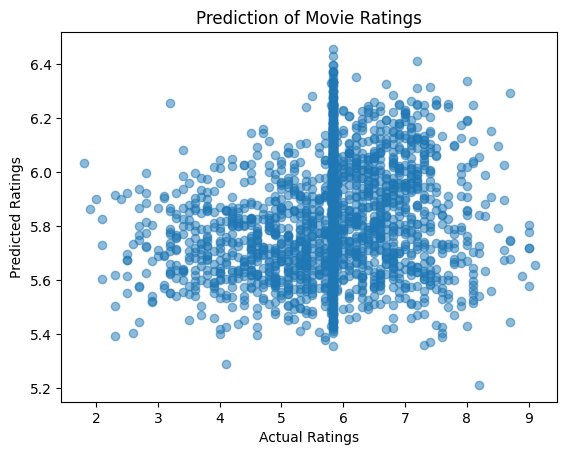

In [18]:
#Visualizing the actual and predicted values
plt.scatter(Y_test,Y_pred,alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Prediction of Movie Ratings")
plt.show()